In [34]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [35]:
CC_df = pd.read_csv("CC_GENERAL.csv")
CC_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploration 

In [36]:
CC_df.shape

(8950, 18)

In [37]:
CC_df.sample(1).iloc[0]

CUST_ID                                  C16838
BALANCE                             1299.554504
BALANCE_FREQUENCY                           1.0
PURCHASES                                   0.0
ONEOFF_PURCHASES                            0.0
INSTALLMENTS_PURCHASES                      0.0
CASH_ADVANCE                        3955.560549
PURCHASES_FREQUENCY                         0.0
ONEOFF_PURCHASES_FREQUENCY                  0.0
PURCHASES_INSTALLMENTS_FREQUENCY            0.0
CASH_ADVANCE_FREQUENCY                      0.5
CASH_ADVANCE_TRX                             11
PURCHASES_TRX                                 0
CREDIT_LIMIT                             2500.0
PAYMENTS                            2084.109173
MINIMUM_PAYMENTS                     267.774368
PRC_FULL_PAYMENT                       0.166667
TENURE                                        8
Name: 6654, dtype: object

In [38]:
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [39]:
CC_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Preprocessing

In [40]:
CC_df.drop(columns='CUST_ID', inplace=True , axis=1)

In [41]:
CC_df['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [42]:
round(CC_df.isnull().sum(axis=0)*100/CC_df.shape[0],2)

BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

array([[<AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>]], dtype=object)

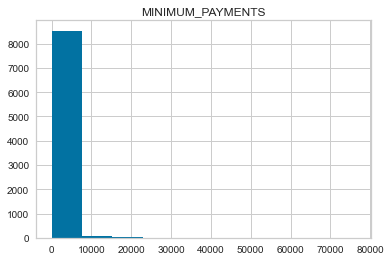

In [43]:
CC_df.hist(column="MINIMUM_PAYMENTS")

In [44]:
CC_df['MINIMUM_PAYMENTS'] = CC_df['MINIMUM_PAYMENTS'].fillna(CC_df['MINIMUM_PAYMENTS'].median())

In [45]:
round(CC_df.isnull().sum(axis=0)*100/CC_df.shape[0],2)

BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    0.00
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [46]:
CC_df['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3        312.343947
4        244.791237
           ...     
8945      48.886365
8946     312.343947
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [47]:
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

array([[<AxesSubplot:title={'center':'CREDIT_LIMIT'}>]], dtype=object)

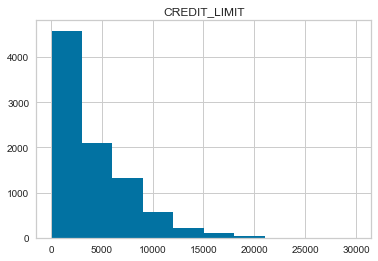

In [48]:
CC_df.hist(column="CREDIT_LIMIT")

In [49]:
CC_df['CREDIT_LIMIT'] = CC_df['CREDIT_LIMIT'].fillna(CC_df['CREDIT_LIMIT'].median())

In [50]:
round(CC_df.isnull().sum(axis=0)*100/CC_df.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [51]:
CC_df['CREDIT_LIMIT']

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64

In [52]:
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [53]:
CC_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [54]:
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## Normalize DataFrame 

In [78]:
from sklearn import preprocessing
df_normalized = preprocessing.normalize(CC_df)
df_normalized

array([[3.93529208e-02, 7.87219116e-04, 9.17897286e-02, ...,
        1.34230246e-01, 0.00000000e+00, 1.15458778e-02],
       [2.93875725e-01, 8.34231054e-05, 0.00000000e+00, ...,
        9.84037362e-02, 2.03922922e-05, 1.10118488e-03],
       [3.10797802e-01, 1.24560826e-04, 9.63066935e-02, ...,
        7.81351110e-02, 0.00000000e+00, 1.49472991e-03],
       ...,
       [2.27729209e-02, 8.11047126e-04, 1.40538302e-01, ...,
        8.02142497e-02, 2.43314235e-04, 5.83954164e-03],
       [2.65239400e-02, 1.64244246e-03, 0.00000000e+00, ...,
        1.09890537e-01, 4.92732934e-04, 1.18255904e-02],
       [1.86405379e-01, 3.33425336e-04, 5.46775599e-01, ...,
        4.41566401e-02, 0.00000000e+00, 3.00082652e-03]])

## PCA n_components=3

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit_transform(df_normalized)
DF_pca3 = pd.DataFrame(pca)
DF_pca3

,0,1,2
0,-0.315267,-0.041609,0.027724
1,0.318365,-0.161007,0.365700
2,-0.207153,-0.180748,-0.127354
3,-0.291843,-0.113087,-0.113674
4,0.142319,-0.090890,-0.100240
...,...,...,...
8945,-0.287758,0.168050,0.037791
8946,-0.228783,0.138443,-0.068374
8947,-0.387086,-0.057507,-0.002314
8948,-0.331979,-0.177041,0.090708


## KMeans

## Choose K

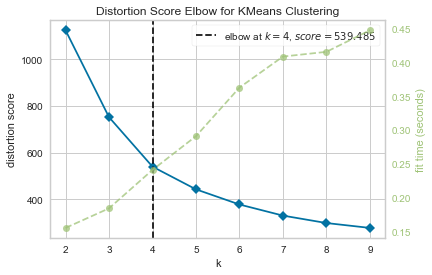

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10)).fit(DF_pca3)
visualizer.show()

## Applying KMeans

In [119]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=4, random_state=0).fit(DF_pca3)
DF_pca3['Kmeans'] = kmeans3.labels_
K_labels_3=DF_pca3['Kmeans']
K_labels_3

0       3
1       2
2       3
3       3
4       1
       ..
8945    3
8946    3
8947    3
8948    3
8949    0
Name: Kmeans, Length: 8950, dtype: int32

## Hierarchical

## Choose K

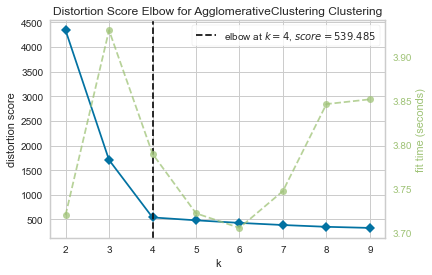

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10)).fit(DF_pca3)
visualizer.show()

## Applying AgglomerativeClustering

In [121]:
from sklearn.cluster import AgglomerativeClustering
clustering3 = AgglomerativeClustering(n_clusters=4).fit(DF_pca3)
DF_pca3['clust'] = clustering3.labels_
C_labels_3=DF_pca3['clust']
C_labels_3

0       3
1       0
2       3
3       3
4       1
       ..
8945    3
8946    3
8947    3
8948    3
8949    2
Name: clust, Length: 8950, dtype: int64

## Gaussian Mixtures

In [84]:
DF_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8950 non-null   float64
 1   1       8950 non-null   float64
 2   2       8950 non-null   float64
dtypes: float64(3)
memory usage: 209.9 KB


In [122]:
from sklearn.mixture import GaussianMixture
Gaussian3 = GaussianMixture(4).fit(DF_pca3)
DF_pca3['Gau'] = Gaussian3.predict(DF_pca3)
GU_labels_3=DF_pca3['Gau']
GU_labels_3

0       1
1       3
2       1
3       1
4       0
       ..
8945    1
8946    1
8947    1
8948    1
8949    2
Name: Gau, Length: 8950, dtype: int64

## DBScan

## Finding the Optimal value of Epsilon

In [128]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(DF_pca3)
distances, indices = neighbors.kneighbors(DF_pca3)
distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distances[knee.knee])


0.07681843500336243


## Applying DBSCAN 

In [129]:
db3 = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(DF_pca3)
DF_pca3['dbs'] = db3.labels_
db_labels_3=DF_pca3['dbs']
print(db_labels_3)
n_clusters_3 = len(set(db_labels_3)) - (1 if -1 in db_labels_3 else 0)
n_noise_3 = list(db_labels_3).count(-1)

0       0
1       1
2       0
3       0
4       2
       ..
8945    0
8946    0
8947    0
8948    0
8949    3
Name: dbs, Length: 8950, dtype: int64


In [130]:
print("Estimated number of clusters: %d" % n_clusters_3)
print("Estimated number of noise points: %d" % n_noise_3)

Estimated number of clusters: 7
Estimated number of noise points: 323


## silhouette_score For Four technique

In [131]:
from sklearn import metrics
print("Silhouette Coefficient For Kmeans : %0.3f" % metrics.silhouette_score(DF_pca3,K_labels_3))
print("Silhouette Coefficient For Hierarchical : %0.3f" % metrics.silhouette_score(DF_pca3,C_labels_3))
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % metrics.silhouette_score(DF_pca3,GU_labels_3))
print("Silhouette Coefficient For DBScan : %0.3f" % metrics.silhouette_score(DF_pca3,db_labels_3))

Silhouette Coefficient For Kmeans : 0.847
Silhouette Coefficient For Hierarchical : 0.847
Silhouette Coefficient For Gaussian Mixtures : 0.847
Silhouette Coefficient For DBScan : 0.853


## PCA n_components=4

In [132]:
from sklearn.decomposition import PCA
pca4 = PCA(n_components=4).fit_transform(df_normalized)
DF_pca4 = pd.DataFrame(pca4)
DF_pca4

,0,1,2,3
0,-0.315267,-0.041609,0.027724,0.139935
1,0.318365,-0.161007,0.365700,-0.042647
2,-0.207153,-0.180748,-0.127354,-0.067867
3,-0.291843,-0.113087,-0.113674,-0.154760
4,0.142319,-0.090890,-0.100240,0.069771
...,...,...,...,...
8945,-0.287758,0.168050,0.037791,0.069282
8946,-0.228783,0.138443,-0.068374,0.193123
8947,-0.387086,-0.057507,-0.002314,0.075588
8948,-0.331979,-0.177041,0.090708,0.118397


## KMeans

## Choose K

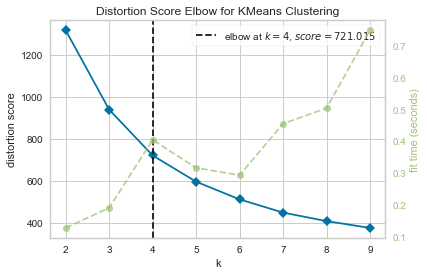

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10)).fit(DF_pca4)
visualizer.show()

## Applying KMeans

In [133]:
from sklearn.cluster import KMeans
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(DF_pca4)
DF_pca4['Kmeans'] = kmeans4.labels_
K_labels_4=DF_pca4['Kmeans'] 
K_labels_4

0       1
1       2
2       1
3       1
4       3
       ..
8945    1
8946    1
8947    1
8948    1
8949    0
Name: Kmeans, Length: 8950, dtype: int32

## Hierarchical

## Choose K

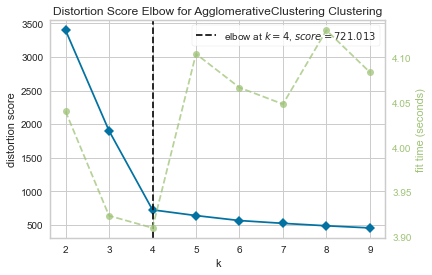

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10)).fit(DF_pca4)
visualizer.show()

## Applying AgglomerativeClustering

In [135]:
from sklearn.cluster import AgglomerativeClustering
clustering4 = AgglomerativeClustering(n_clusters=5).fit(DF_pca4)
DF_pca4['clust'] = clustering4.labels_
C_labels_4=DF_pca4['clust']
C_labels_4

0       2
1       0
2       2
3       2
4       3
       ..
8945    2
8946    2
8947    2
8948    2
8949    1
Name: clust, Length: 8950, dtype: int64

## Gaussian Mixtures

In [136]:
DF_pca4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8950 non-null   float64
 1   1       8950 non-null   float64
 2   2       8950 non-null   float64
 3   3       8950 non-null   float64
 4   Kmeans  8950 non-null   int32  
 5   clust   8950 non-null   int64  
dtypes: float64(4), int32(1), int64(1)
memory usage: 384.7 KB


In [137]:
from sklearn.mixture import GaussianMixture
Gaussian4 = GaussianMixture(5).fit(DF_pca4)
DF_pca4['gaus'] = Gaussian4.predict(DF_pca4)
GU_labels_4=DF_pca4['gaus'] 
GU_labels_4

0       0
1       2
2       0
3       0
4       1
       ..
8945    0
8946    0
8947    0
8948    0
8949    3
Name: gaus, Length: 8950, dtype: int64

## DBScan

## Finding the Optimal value of Epsilon

In [138]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(DF_pca4)
distances, indices = neighbors.kneighbors(DF_pca4)
distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distances[knee.knee])

0.11406787697958201


## Applying DBSCAN 

In [139]:
db4 = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(DF_pca4)
DF_pca4['dbs'] = db4.labels_
db_labels_4=DF_pca4['dbs']
print(db_labels_4)
n_clusters_4 = len(set(db_labels_4)) - (1 if -1 in db_labels_4 else 0)
n_noise_4 = list(db_labels_4).count(-1)

0       0
1       1
2       0
3       0
4       2
       ..
8945    0
8946    0
8947    0
8948    0
8949    3
Name: dbs, Length: 8950, dtype: int64


In [140]:
print("Estimated number of clusters: %d" % n_clusters_4)
print("Estimated number of noise points: %d" % n_noise_4)

Estimated number of clusters: 7
Estimated number of noise points: 438


## silhouette_score For Four technique

In [141]:
from sklearn import metrics
print("Silhouette Coefficient For Kmeans : %0.3f" % metrics.silhouette_score(DF_pca4,K_labels_4))
print("Silhouette Coefficient For Hierarchical : %0.3f" % metrics.silhouette_score(DF_pca4,C_labels_4))
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % metrics.silhouette_score(DF_pca4,GU_labels_4))
print("Silhouette Coefficient For DBScan : %0.3f" % metrics.silhouette_score(DF_pca4,db_labels_4))

Silhouette Coefficient For Kmeans : 0.791
Silhouette Coefficient For Hierarchical : 0.820
Silhouette Coefficient For Gaussian Mixtures : 0.820
Silhouette Coefficient For DBScan : 0.854


## PCA n_components=5

In [142]:
from sklearn.decomposition import PCA
pca5 = PCA(n_components=5).fit_transform(df_normalized)
DF_pca5 = pd.DataFrame(pca5)
DF_pca5

,0,1,2,3,4
0,-0.315267,-0.041609,0.027724,0.139935,-0.007226
1,0.318365,-0.161007,0.365700,-0.042647,0.058598
2,-0.207153,-0.180748,-0.127354,-0.067867,-0.067249
3,-0.291843,-0.113087,-0.113674,-0.154760,0.053496
4,0.142319,-0.090890,-0.100240,0.069771,-0.313983
...,...,...,...,...,...
8945,-0.287758,0.168050,0.037791,0.069282,-0.006266
8946,-0.228783,0.138443,-0.068374,0.193123,0.111598
8947,-0.387086,-0.057507,-0.002314,0.075588,0.065658
8948,-0.331979,-0.177041,0.090708,0.118397,0.034254


## KMeans

## Choose K

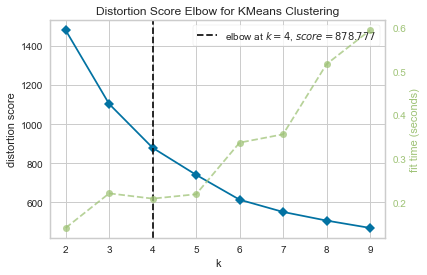

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10)).fit(DF_pca5)
visualizer.show()

## Applying KMeans

In [144]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=4, random_state=0).fit(DF_pca5)
DF_pca5['Kmeans'] = kmeans5.labels_
K_labels_5=DF_pca5['Kmeans']
K_labels_5

0       0
1       3
2       0
3       0
4       1
       ..
8945    0
8946    0
8947    0
8948    0
8949    2
Name: Kmeans, Length: 8950, dtype: int32

## Hierarchical

## Choose K

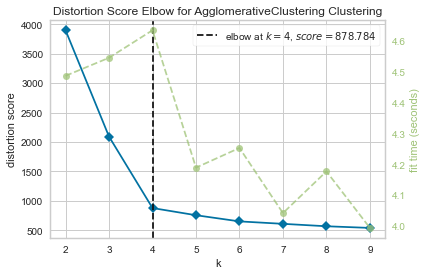

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [145]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10)).fit(DF_pca5)
visualizer.show()

## Applying AgglomerativeClustering

In [146]:
from sklearn.cluster import AgglomerativeClustering
clustering5 = AgglomerativeClustering(n_clusters=5).fit(DF_pca5)
DF_pca5['clust'] = clustering5.labels_
C_labels_5=DF_pca5['clust'] 
C_labels_5

0       2
1       0
2       2
3       2
4       3
       ..
8945    2
8946    2
8947    2
8948    2
8949    1
Name: clust, Length: 8950, dtype: int64

## Gaussian Mixtures

In [147]:
DF_pca5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8950 non-null   float64
 1   1       8950 non-null   float64
 2   2       8950 non-null   float64
 3   3       8950 non-null   float64
 4   4       8950 non-null   float64
 5   Kmeans  8950 non-null   int32  
 6   clust   8950 non-null   int64  
dtypes: float64(5), int32(1), int64(1)
memory usage: 454.6 KB


In [148]:
from sklearn.mixture import GaussianMixture
Gaussian5 = GaussianMixture(5).fit(DF_pca5)
DF_pca5['Guas'] = Gaussian5.predict(DF_pca5)
GU_labels_5=DF_pca5['Guas']
GU_labels_5

0       4
1       1
2       0
3       0
4       3
       ..
8945    4
8946    0
8947    4
8948    0
8949    2
Name: Guas, Length: 8950, dtype: int64

## DBScan

## Finding the Optimal value of Epsilon

In [149]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(DF_pca5)
distances, indices = neighbors.kneighbors(DF_pca5)
distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distances[knee.knee])

0.13755209869201873


## Applying DBSCAN 

In [152]:
db5 = DBSCAN(eps=distances[knee.knee], min_samples=7).fit(DF_pca5)
DF_pca5['dbs'] = db5.labels_
db_labels_5=DF_pca5['dbs'] 
print(db_labels_5)
n_clusters_5 = len(set(db_labels_5)) - (1 if -1 in db_labels_5 else 0)
n_noise_5 = list(db_labels_5).count(-1)

0       0
1       1
2       2
3       2
4       3
       ..
8945    0
8946    2
8947    0
8948    2
8949    5
Name: dbs, Length: 8950, dtype: int64


In [153]:
print("Estimated number of clusters: %d" % n_clusters_5)
print("Estimated number of noise points: %d" % n_noise_5)

Estimated number of clusters: 12
Estimated number of noise points: 392


## silhouette_score For Four technique

In [154]:
from sklearn import metrics
print("Silhouette Coefficient For Kmeans : %0.3f" % metrics.silhouette_score(DF_pca5,K_labels_5))
print("Silhouette Coefficient For Hierarchical : %0.3f" % metrics.silhouette_score(DF_pca5,C_labels_5))
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % metrics.silhouette_score(DF_pca5,GU_labels_5))
print("Silhouette Coefficient For DBScan : %0.3f" % metrics.silhouette_score(DF_pca5,db_labels_5))

Silhouette Coefficient For Kmeans : 0.585
Silhouette Coefficient For Hierarchical : 0.562
Silhouette Coefficient For Gaussian Mixtures : 0.787
Silhouette Coefficient For DBScan : 0.829


# All Scores

In [157]:
print("-------- n_components=3 ------------")
print("Silhouette Coefficient For Kmeans : %0.3f" % metrics.silhouette_score(DF_pca3,K_labels_3))
print("Silhouette Coefficient For Hierarchical : %0.3f" % metrics.silhouette_score(DF_pca3,C_labels_3))
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % metrics.silhouette_score(DF_pca3,GU_labels_3))
print("Silhouette Coefficient For DBScan : %0.3f" % metrics.silhouette_score(DF_pca3,db_labels_3))
print("\n")
print("-------- n_components=4 ------------")
print("Silhouette Coefficient For Kmeans : %0.3f" % metrics.silhouette_score(DF_pca4,K_labels_4))
print("Silhouette Coefficient For Hierarchical : %0.3f" % metrics.silhouette_score(DF_pca4,C_labels_4))
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % metrics.silhouette_score(DF_pca4,GU_labels_4))
print("Silhouette Coefficient For DBScan : %0.3f" % metrics.silhouette_score(DF_pca4,db_labels_4))
print("\n")
print("-------- n_components=5 ------------")
print("Silhouette Coefficient For Kmeans : %0.3f" % metrics.silhouette_score(DF_pca5,K_labels_5))
print("Silhouette Coefficient For Hierarchical : %0.3f" % metrics.silhouette_score(DF_pca5,C_labels_5))
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % metrics.silhouette_score(DF_pca5,GU_labels_5))
print("Silhouette Coefficient For DBScan : %0.3f" % metrics.silhouette_score(DF_pca5,db_labels_5))

-------- n_components=3 ------------
Silhouette Coefficient For Kmeans : 0.847
Silhouette Coefficient For Hierarchical : 0.847
Silhouette Coefficient For Gaussian Mixtures : 0.847
Silhouette Coefficient For DBScan : 0.853


-------- n_components=4 ------------
Silhouette Coefficient For Kmeans : 0.791
Silhouette Coefficient For Hierarchical : 0.820
Silhouette Coefficient For Gaussian Mixtures : 0.820
Silhouette Coefficient For DBScan : 0.854


-------- n_components=5 ------------
Silhouette Coefficient For Kmeans : 0.585
Silhouette Coefficient For Hierarchical : 0.562
Silhouette Coefficient For Gaussian Mixtures : 0.787
Silhouette Coefficient For DBScan : 0.829
